In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

In [3]:
df=pd.read_csv('concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
x=df.drop(columns=['Strength'])
y=df.iloc[:,-1]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)



0.6275531792314848

In [8]:
np.mean(cross_val_predict(lr,x,y))


np.float64(36.666402153483226)

c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


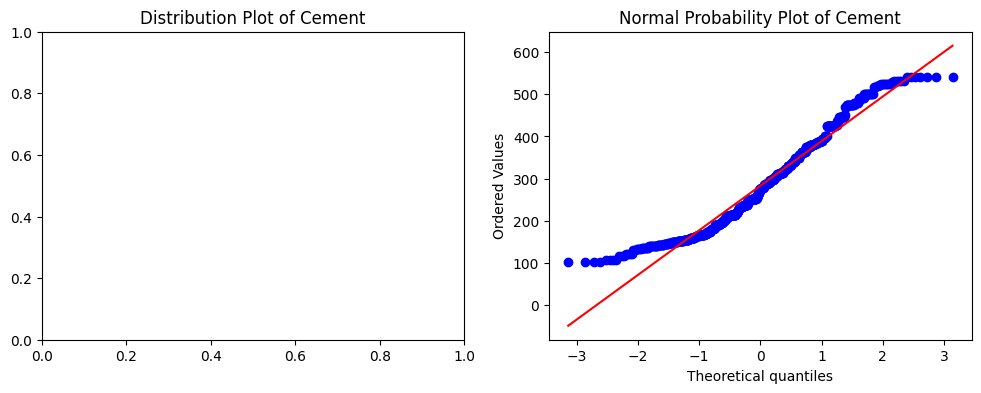

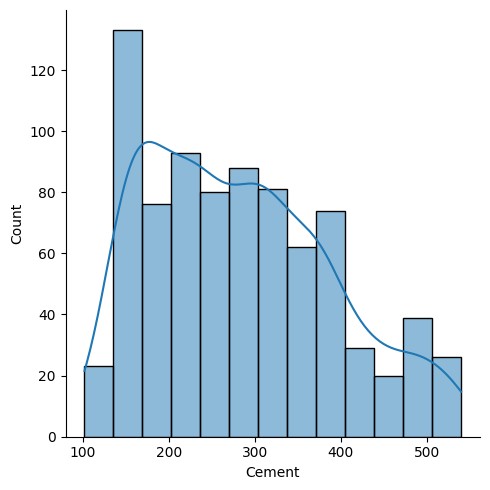

c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


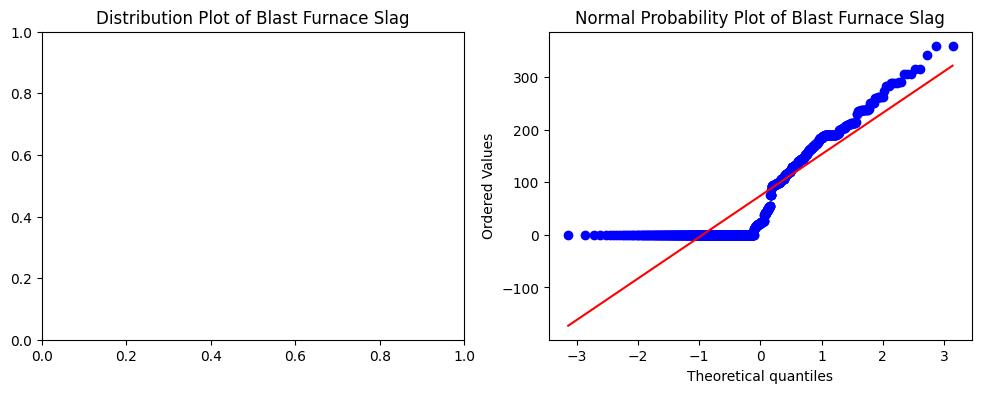

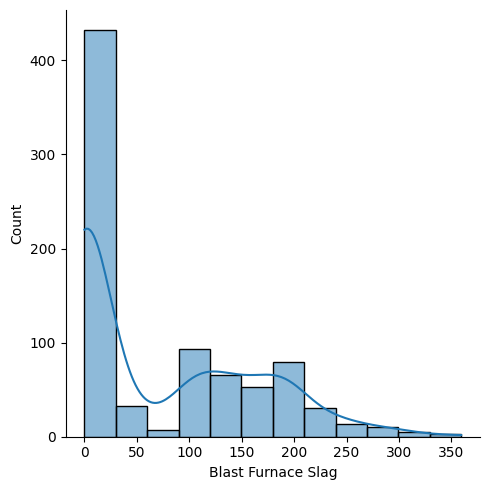

c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


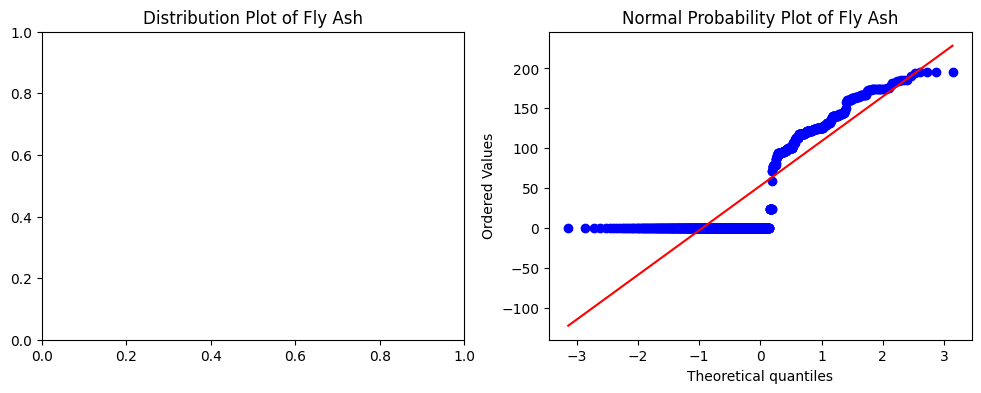

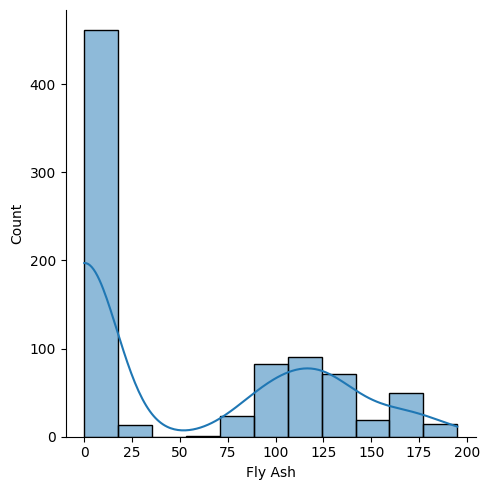

c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


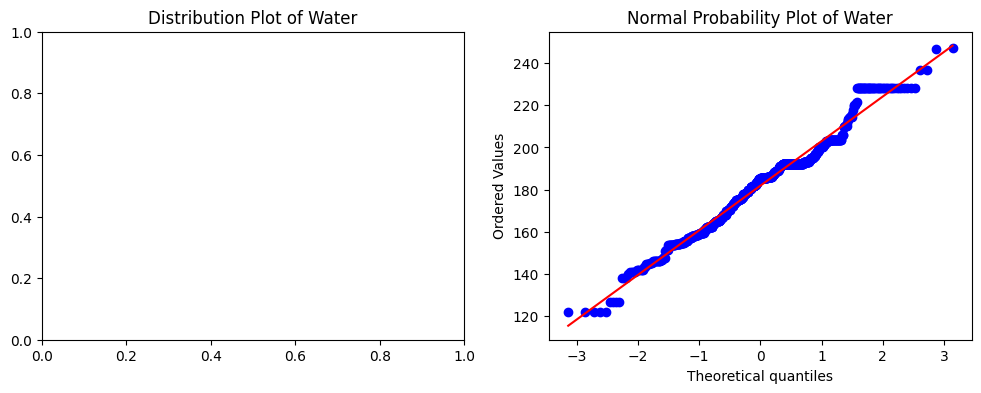

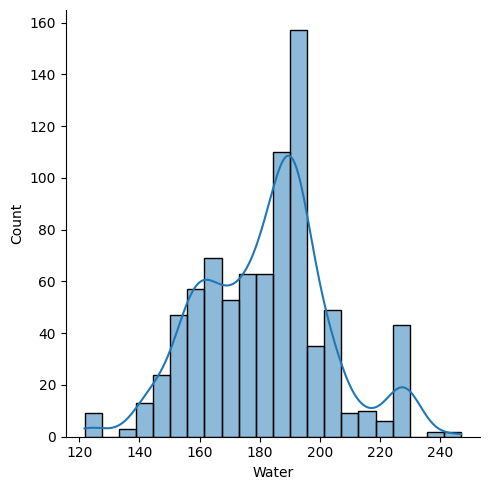

c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


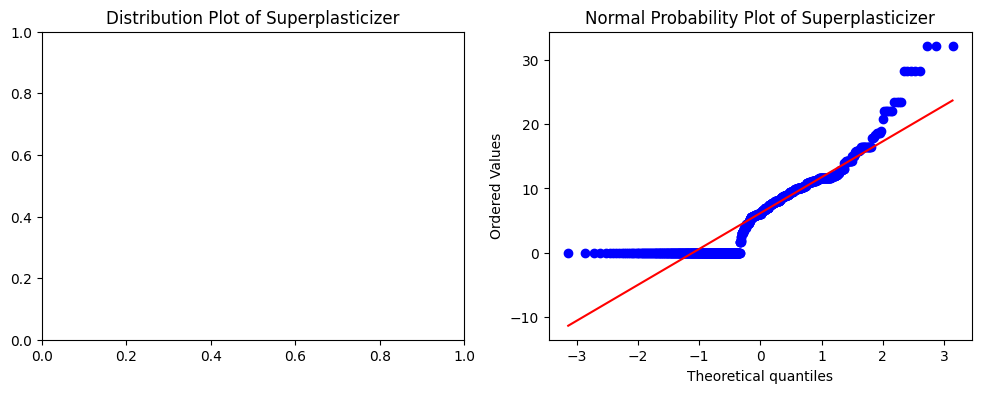

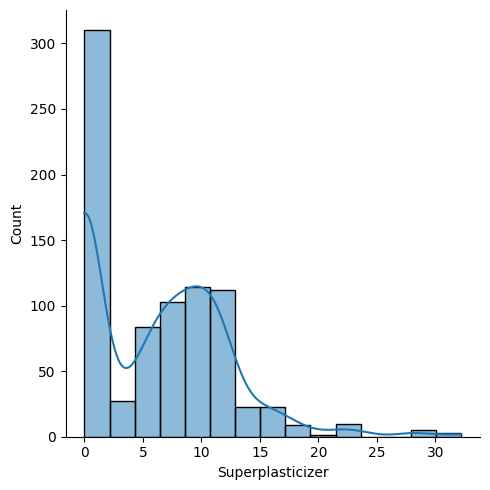

c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


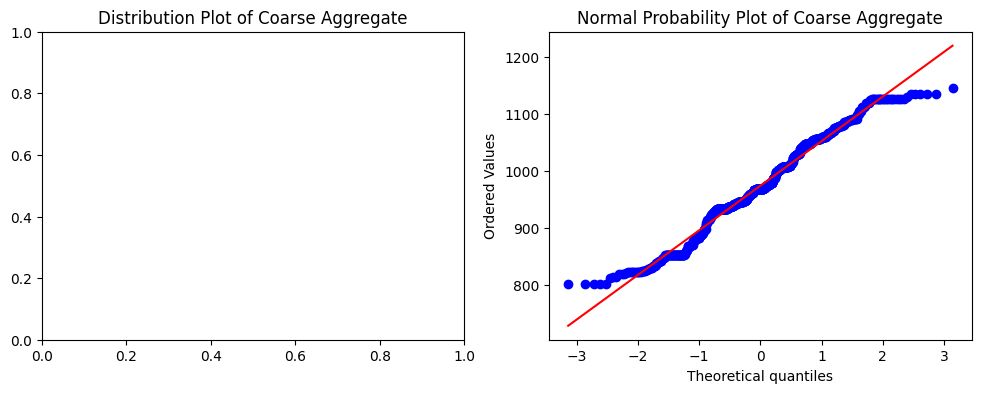

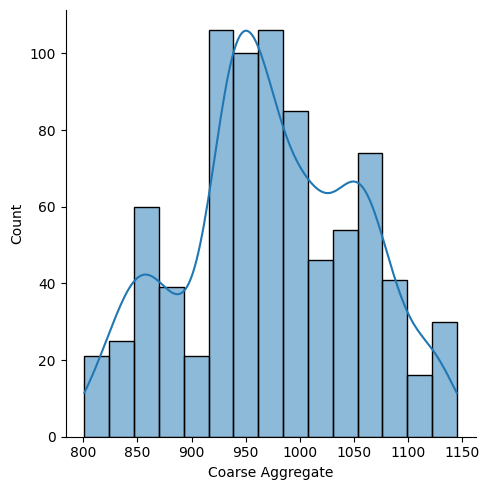

c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


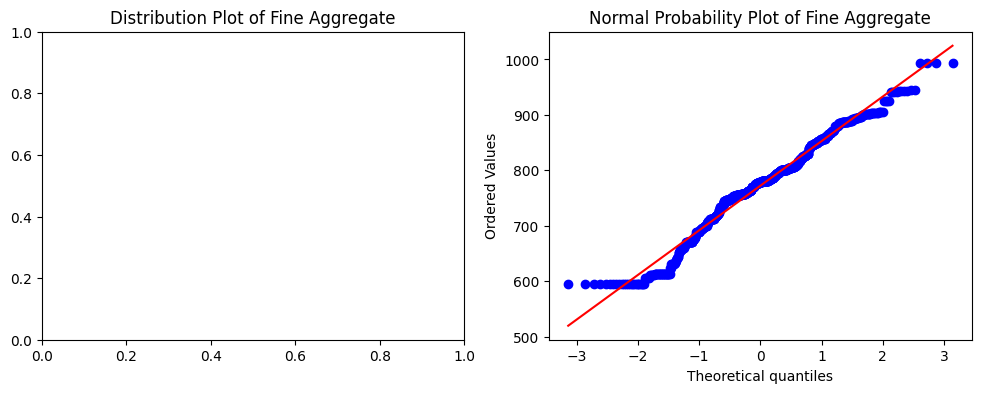

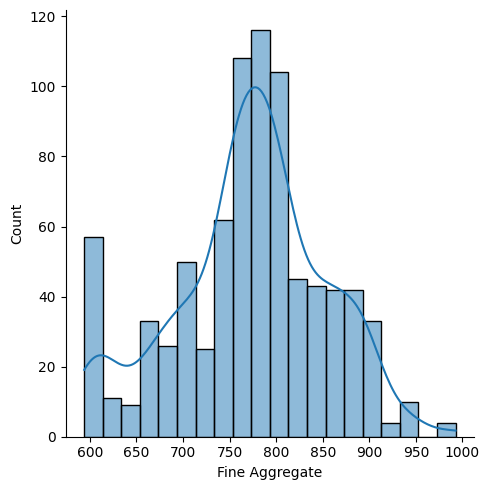

c:\Users\INTEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


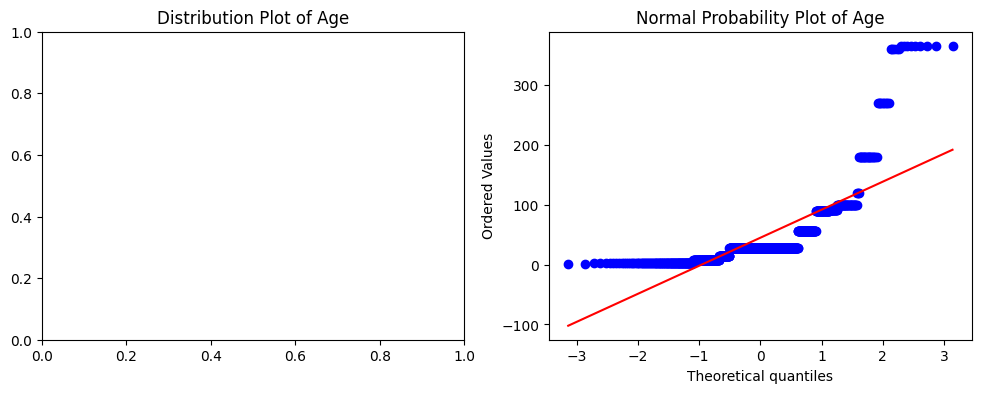

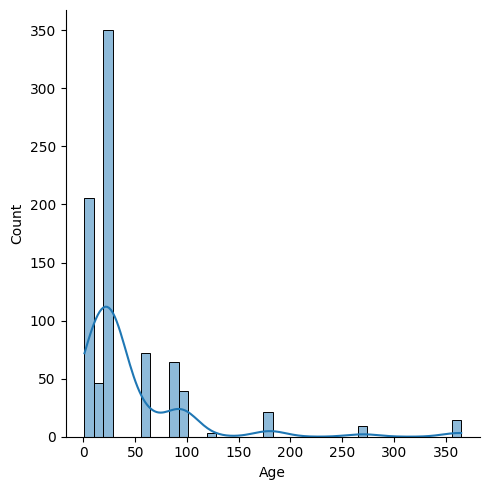

In [9]:
for col in X_train.columns:
    # Create a figure and a set of subplots for each column
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    
    # Plot Seaborn distribution on the first subplot
    sns.displot(X_train[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution Plot of {col}')
    
    # Plot stats.probplot on the second subplot
    stats.probplot(X_train[col], dist='norm', plot=axes[1])
    axes[1].set_title(f'Normal Probability Plot of {col}')
    
    # Improve plot spacing and display
    plt.tight_layout()
    plt.show()

In [10]:
pt = PowerTransformer(method='box-cox', standardize=False)

X_train_trf = pt.fit_transform(X_train + 0.000001)

X_test_trf = pt.transform(X_test + 0.000001)

box_cox_lambdas = pt.lambdas_

df1 = pd.DataFrame({
    'cols': X_train.columns,
    'box_cox_lambdas': box_cox_lambdas
})

In [15]:
lr=LinearRegression()

lr.fit(X_train_trf,y_train)

y_pred2=lr.predict(X_test_trf)
r2_score(y_test,y_pred2)

0.8047825008078892

In [25]:
X_trf=pt.fit_transform(x+0.000001)


score=np.mean(cross_val_predict(lr,X_trf,y,scoring='r2'))
print(score)

TypeError: got an unexpected keyword argument 'scoring'